In [5]:
import NaCsData
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Example 1: Get Survivals per site, and avg survivals per parameter with no modifications
data = NaCsData.NaCsData('20231030', '125545', 'N:\\NaCsLab\\Data\\')

load_img = np.array([2])
surv_img = np.array([4])

survs, surv_errs, unique_params = data.get_survival_prob_by_site(load_img, surv_img)

# The returned survs is nparams x nsites
nsites = survs.shape[1]
nparams = survs.shape[0]

# TODO: No support yet for ScanGroup in Python
X = unique_params

# Plot sites 1 to 5
plt.figure()
for site in range(5):
    plt.errorbar(X, survs[:,site + 1], surv_errs[:, site + 1])

NameError: name 'NaCsData' is not defined

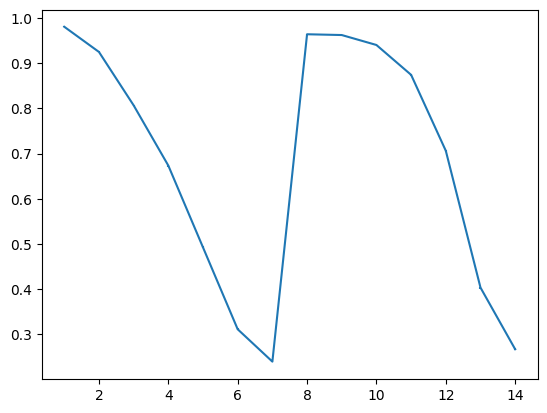

In [ ]:
# Now we get the average
surv_avg, surv_avg_err, unique_params = data.get_survival_prob_avg(load_img, surv_img)
plt.figure()
plt.errorbar(X, surv_avg, surv_avg_err)
plt.show()

In [ ]:
# Example 2: Time bin
chr(47)

'/'

In [ ]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_load_and_surv_logs',
 'datasets',
 'get_expectation_val',
 'get_load_idxs',
 'get_logicals',
 'get_survival_prob_avg',
 'get_survival_prob_by_site',
 'n_datasets',
 'param_map']

In [ ]:
data.datasets[0].data.keys()

<KeysViewHDF5 ['#refs#', 'Analysis', 'Scan']>

In [ ]:
data.datasets[0].data["Scan/ScanGroup"].keys()

<KeysViewHDF5 ['base', 'runparam', 'scans', 'use_var_base', 'use_var_scans', 'version']>

In [ ]:
data.datasets[0].data["Scan/ScanGroup/base/params"].keys()

<KeysViewHDF5 ['CsBlastSLMF3Amp', 'CsBlastSLMF4Amp', 'DoCoolNa', 'DoDetection', 'DoOP', 'PTweezerSLMCsBlast', 'ParamUnits', 'PlotScale', 'bCsBlastSLM', 'bTrapMerge', 'tCsRampSLMTrap', 'tCsRampSLMWait']>

In [ ]:
data.datasets[0].data["Scan/ScanGroup/base/params"].keys()

<KeysViewHDF5 ['CsBlastSLMF3Amp', 'CsBlastSLMF4Amp', 'DoCoolNa', 'DoDetection', 'DoOP', 'PTweezerSLMCsBlast', 'ParamUnits', 'PlotScale', 'bCsBlastSLM', 'bTrapMerge', 'tCsRampSLMTrap', 'tCsRampSLMWait']>

In [1]:
import utils
import h5py
import SingleData
import DataProcessTools as dpt
import PlotProcessTools as ppt
import numpy as np
import itertools
from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [10]:
data2 = SingleData.SingleData('20250206', '184216', 'W:\\NaCsRydLab\\Data\\')

Loading W:\NaCsRydLab\Data\20250206\data_20250206_184216\data_20250206_184216.mat


In [11]:
data2.data['Analysis']['SummaryData']['av_images'].shape

(90, 160, 8)

In [4]:
%matplotlib tk
# fig, ax = plt.subplots()
# ax.imshow(data2.data['Analysis']['SummaryData']['av_images'][:,:,2], extent=(-79.5, 80.5, 44.5, -45.5))
# rect = patches.Rectangle((-58 - 4 / 2 - 0.5, 10 - 4 / 2 - 0.5), 5, 5, edgecolor='red', facecolor='none', linewidth=2)
# ax.add_patch(rect)
# ax.text(-58 - 3.5, 10 - 3.5, '1', color='red')

ppt.plot_images(data2.data['Analysis']['SummaryData']['av_images'], data2.data['Scan']['SingleAtomSites'], [data2.data['Scan']['BoxSize'] for i in range(8)])


(<Figure size 640x480 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

In [12]:
sigs, param_list, _ = data2.get_signals()
ppt.plot_histograms(sigs[2:3, 0:4,:])

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >],
        [<Axes: >],
        [<Axes: >],
        [<Axes: xlabel='Electron counts'>]], dtype=object))

In [20]:
len(np.array([2,3,4]))

3

In [2]:
data = SingleData.SingleData('20231030', '125545', 'N:\\NaCsLab\\Data\\')

Loading N:\NaCsLab\Data\20231030\data_20231030_125545\data_20231030_125545.mat


In [3]:
surv, surv_err = data.get_site_by_site_survival([2], [4])
params, param_name = data.get_scan_param(1,1,1)

[  0.  10.  20.  30.  50. 100. 200.]
[0.97007042 0.94483986 0.8479021  0.72181818 0.46428571 0.24418605
 0.11443662]
[  0.  10.  20.  30.  50. 100. 200.]
[0.98458904 0.91860465 0.78846154 0.71357616 0.51993355 0.30130293
 0.19370861]
[  0.  10.  20.  30.  50. 100. 200.]
[0.98669202 0.94107744 0.86443662 0.7670068  0.57317073 0.36538462
 0.27910959]
[  0.  10.  20.  30.  50. 100. 200.]
[0.98339483 0.91403509 0.82536765 0.62541254 0.50892857 0.26342282
 0.16856061]
[  0.  10.  20.  30.  50. 100. 200.]
[0.98028674 0.9362069  0.79827586 0.71240602 0.52871622 0.33848797
 0.26430976]
[  0.  10.  20.  30.  50. 100. 200.]
[0.98404255 0.95034247 0.76268116 0.6362069  0.49479167 0.28401361
 0.16784452]
[  0.  10.  20.  30.  50. 100. 200.]
[0.98141892 0.92084942 0.79676259 0.70376712 0.47610922 0.30639098
 0.24035088]
[  0.  10.  20.  30.  50. 100. 200.]
[0.98314607 0.95882353 0.78320312 0.64869888 0.51060071 0.31081081
 0.18592058]
[  0.  10.  20.  30.  50. 100. 200.]
[0.96532847 0.91607143 0.84

(<Figure size 640x480 with 1 Axes>, array([[<Axes: >]], dtype=object))

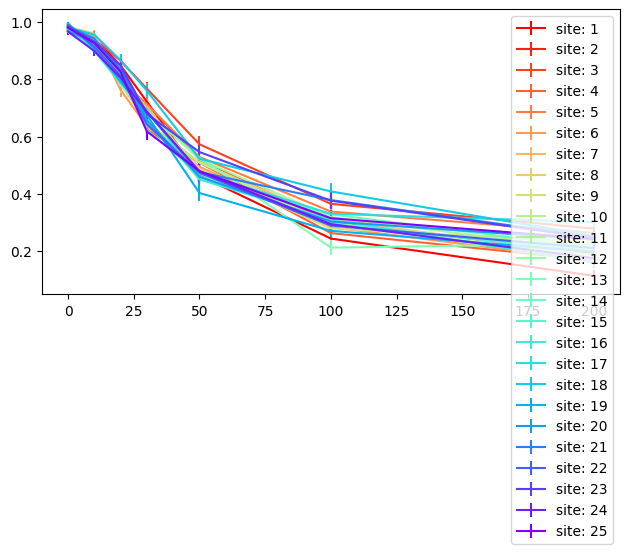

In [6]:
ppt.plot_survival(params/1e-6, surv[np.newaxis, 0:25,0:7], surv_err[np.newaxis, 0:25, 0:7])

In [9]:
%matplotlib tk
# fig, ax = plt.subplots()
# ax.imshow(data2.data['Analysis']['SummaryData']['av_images'][:,:,2], extent=(-79.5, 80.5, 44.5, -45.5))
# rect = patches.Rectangle((-58 - 4 / 2 - 0.5, 10 - 4 / 2 - 0.5), 5, 5, edgecolor='red', facecolor='none', linewidth=2)
# ax.add_patch(rect)
# ax.text(-58 - 3.5, 10 - 3.5, '1', color='red')

ppt.plot_images(data.data['Analysis']['SummaryData']['av_images'])


(<Figure size 640x480 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [9]:
ax[0,1]

<Axes: >

In [ ]:
utils.cvt_unicode_to_str(data2.get_fixed_param(1)['scanfilename'])

'MOTScans'

In [ ]:
results = data2.data['Scan']['ScanGroup']

In [ ]:
results['scans']['vars'][0]['params']


[{'Re2DAlg': {'HorzOffset': array([-200000., -100000.,       0.,  100000.,  200000.])}},
 {'Re2DAlg': {'HorzSpacing': array([-50000., -25000.,      0.,  25000.,  50000.])}}]

In [ ]:
results['base']['vars']

array([0, 0], dtype=uint64)

In [ ]:
utils.obtain_recursive_key_and_value(results['scans']['params'][2])

(array(2.), 'Re2DAlg.VertScanIdx')

In [3]:
data3 = SingleData.SingleData('20250214','175910', 'W:\\NaCsRydLab\\Data\\')

Loading W:\NaCsRydLab\Data\20250214\data_20250214_175910\data_20250214_175910.mat


In [4]:
logicals, param_list, _ = data3.get_logicals()
logicals.shape

(4, 40, 434)

In [5]:
surv, surv_err = dpt.calculate_survival(logicals[0,0,:], logicals[2,0,:], param_list)
load_rate, load_rate_err = dpt.calculate_loading(logicals[1,:,:], param_list)

In [ ]:
ppt.plot_survival()

[1, 2, 3, 4, 5]

In [16]:
data3.data['Scan']['ScanGroup']['scans']['baseidx'].size

1

In [9]:
data3.get_scan_param(1,1,1)

TypeError: len() of unsized object

In [ ]:
data3.data['Analysis']['SurvivalProbability']

array([[0.75935374, 0.74588816, 0.74830508, 0.73707665, 0.77241963,
        0.74307958, 0.78455285, 0.73421053, 0.77574171, 0.77185315,
        0.76903553, 0.80087719],
       [0.82297688, 0.82796486, 0.86842105, 0.83602941, 0.81147541,
        0.83452722, 0.85176991, 0.83928571, 0.80800654, 0.8283859 ,
        0.81019523, 0.79621381]])

In [ ]:
surv, surv_err = data3.get_site_by_site_survival([2], [4], site_idxs=[18])

In [ ]:
surv,surv_err = data3.get_avg_survival([2],[4])

In [ ]:
surv

array([0.82297688, 0.82796486, 0.86842105, 0.83602941, 0.81147541,
       0.83452722, 0.85176991, 0.83928571, 0.80800654, 0.8283859 ,
       0.81019523, 0.79621381])

In [ ]:
test = np.zeros((1,4,5))
for i in range(1):
    for j in range(4):
        for k in range(5):
            test[i][j][k] = k + j * 0.2

In [ ]:
np.squeeze(np.reshape(test, (1, 20)))

array([0. , 1. , 2. , 3. , 4. , 0.2, 1.2, 2.2, 3.2, 4.2, 0.4, 1.4, 2.4,
       3.4, 4.4, 0.6, 1.6, 2.6, 3.6, 4.6])

In [ ]:
data2.data['Scan']['ScanGroup']['scans']

NameError: name 'data2' is not defined

In [ ]:
a = np.array([1,2,3,4,5])
condition = (a < 2) & (a > 4)
a[(a < 2) & (a > 4)]

array([], dtype=int64)

In [ ]:
import SingleData
import numpy as np

data3 = SingleData.SingleData('20250212', '101956', 'W:\\NaCsRydLab\\Data\\')

Loading W:\NaCsRydLab\Data\20250212\data_20250212_101956\data_20250212_101956.mat


In [ ]:
results = data3.get_logicals(seq_idxs=np.array([1,2,3]), img_idxs=[2,4,3])
data3.seq_idxs

array([   1,    2,    3, ..., 1314, 1315, 1316], shape=(1316,))

In [ ]:
import utils

In [ ]:
dict1 = {'a': {'x': 1, 'y': 2, 'arr': [{'a' : 6}, {'b': 8 }, [1,1]]}, 'b': 3}
dict2 = {'a': {'y': 10, 'z': 20, 'arr' : [{'a': 7}, [0,0], {'c': 8}]}, 'c': 4}
dict1_copy = utils.remove_repeated_keys(dict1, dict2)

In [ ]:
dict3 = {'a': {'x': 3, 'y': 4}, 'b': 8}
dict4 = {'a': {'y' : 2}}
dict3_copy = utils.remove_repeated_keys(dict3, dict4)

In [ ]:
dict3_copy

{'a': {'x': 3}, 'b': 8}

In [ ]:
a[[0,1], 1, [0,2,3]]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

In [ ]:
np.where(np.in1d(np.array([0,1,2]), np.array([1,2,3])))[0]

C:\Users\goyan\AppData\Local\Temp\ipykernel_9476\4178106197.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.where(np.in1d(np.array([0,1,2]), np.array([1,2,3])))[0]


array([1, 2])